In [3]:
%matplotlib inline

In [4]:
import parsing
import matplotlib.pyplot as plt
import numpy as np

In [5]:
image_id = '59'

(256, 256)

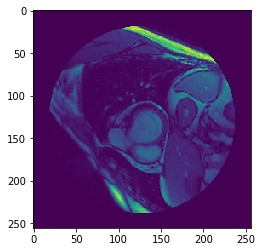

In [6]:
# load and display the DICOM image
dicom_file = './final_data/dicoms/SCD0000101/{}.dcm'.format(image_id)
dicom = parsing.parse_dicom_file(dicom_file)
plt.imshow(dicom)
np.shape(dicom)

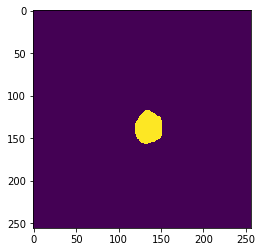

In [7]:
# load and display the contour mask
inner_contour_file = './final_data/contourfiles/SC-HF-I-1/i-contours/IM-0001-{}-icontour-manual.txt'.format(image_id.zfill(4))
inner_contour = parsing.parse_contour_file(inner_contour_file)
dicom_size = np.shape(dicom)
inner_mask = parsing.poly_to_mask(inner_contour, dicom_size[0], dicom_size[1])
plt.imshow(inner_mask)

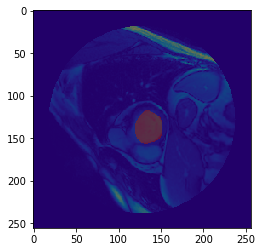

In [8]:
# show the DICOM image with the contour mask overlay
plt.imshow(dicom)
plt.imshow(inner_mask, cmap='jet', alpha=0.5)

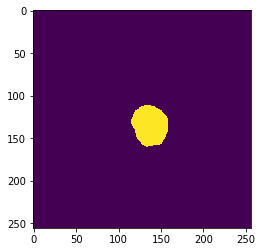

In [9]:
# load and display the _outer_ mask
outer_contour_file = './final_data/contourfiles/SC-HF-I-1/o-contours/IM-0001-{}-ocontour-manual.txt'.format(image_id.zfill(4))
outer_contour = parsing.parse_contour_file(outer_contour_file)
outer_mask = parsing.poly_to_mask(outer_contour, dicom_size[0], dicom_size[1])
plt.imshow(outer_mask)

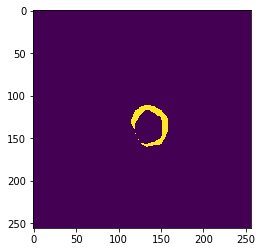

In [10]:
# find the outline by XORing the masks
outline = outer_mask ^ inner_mask
plt.imshow(outline)

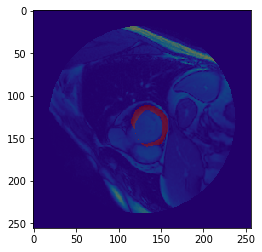

In [11]:
# display DICOM with outline overlay 
plt.imshow(dicom)
plt.imshow(outline, cmap='jet', alpha=0.5)